In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS

import pitszi

In [2]:
C = pitszi.Model(M500=1e15*u.Msun, silent=True)
C.set_pressure_profile_universal_param('A10MD')
C.set_density_profile_polytropic_param()
C.model_pressure_fluctuation['Norm'] = 0.5
C.model_pressure_fluctuation['statistics'] = 'gaussian'
C.model_gamma_fluctuation = 1.3

# Check that Pk thermo are all ok

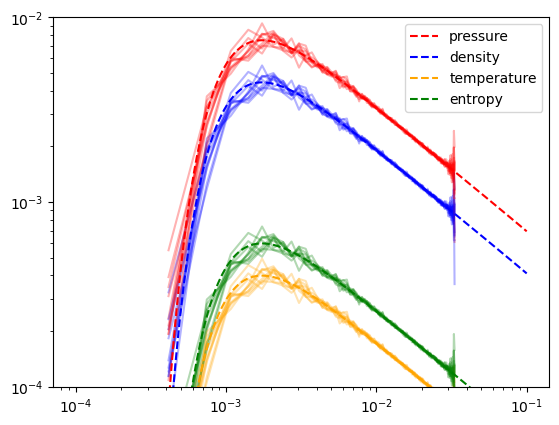

In [3]:
k_p, pk_p = C.get_pressure_fluctuation_spectrum()
k_n, pk_n = C.get_density_fluctuation_spectrum()
k_t, pk_t = C.get_temperature_fluctuation_spectrum()
k_k, pk_k = C.get_entropy_fluctuation_spectrum()
for i in range(10):
    C.new_seed()
    dp_cube = C.get_pressure_cube_fluctuation()
    dn_cube = C.get_density_cube_fluctuation()
    dt_cube = C.get_temperature_cube_fluctuation()
    dk_cube = C.get_entropy_cube_fluctuation()
    k_p_meas, pk_p_meas = pitszi.utils_pk.extract_pk3d(dp_cube, C.get_map_reso(physical=True).value, C.los_reso.value)
    k_n_meas, pk_n_meas = pitszi.utils_pk.extract_pk3d(dn_cube, C.get_map_reso(physical=True).value, C.los_reso.value)
    k_t_meas, pk_t_meas = pitszi.utils_pk.extract_pk3d(dt_cube, C.get_map_reso(physical=True).value, C.los_reso.value)
    k_k_meas, pk_k_meas = pitszi.utils_pk.extract_pk3d(dk_cube, C.get_map_reso(physical=True).value, C.los_reso.value)
    plt.loglog(k_p_meas, (k_p_meas**3*pk_p_meas), color='r', alpha=0.3)
    plt.loglog(k_n_meas, (k_n_meas**3*pk_n_meas), color='b', alpha=0.3)
    plt.loglog(k_t_meas, (k_t_meas**3*pk_t_meas), color='orange', alpha=0.3)
    plt.loglog(k_k_meas, (k_k_meas**3*pk_k_meas), color='green', alpha=0.3)
plt.loglog(k_p.to_value('kpc-1'), (k_p**3*pk_p).to_value(''), color='r', ls='--', label='pressure')
plt.loglog(k_n.to_value('kpc-1'), (k_n**3*pk_n).to_value(''), color='b', ls='--', label='density')
plt.loglog(k_t.to_value('kpc-1'), (k_t**3*pk_t).to_value(''), color='orange', ls='--', label='temperature')
plt.loglog(k_k.to_value('kpc-1'), (k_k**3*pk_k).to_value(''), color='green', ls='--', label='entropy')
plt.ylim(1e-4,1e-2)
plt.legend()

# Extract observables images

Text(0.5, 1.0, 'Sx')

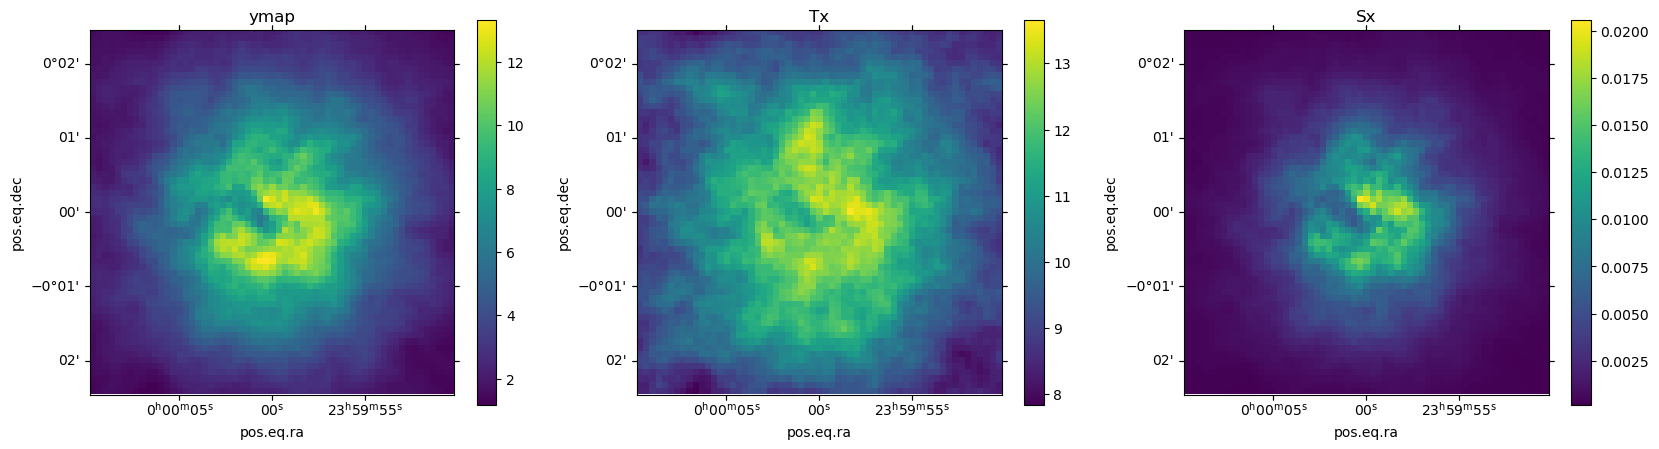

In [4]:
C.new_seed()

sz = C.get_sz_map()
Tx = C.get_Tx_map(no_fluctuations=False)
sx = C.get_sx_map()

plt.figure(figsize=(20,5))
ax = plt.subplot(1, 3, 1, projection=WCS(C.get_map_header()))
plt.imshow(1e5*sz)
plt.colorbar()
plt.title('ymap')

ax = plt.subplot(1, 3, 2, projection=WCS(C.get_map_header()))
plt.imshow(Tx.value)
plt.colorbar()
plt.title('Tx')

ax = plt.subplot(1, 3, 3, projection=WCS(C.get_map_header()))
plt.imshow(sx)
plt.colorbar()
plt.title('Sx')

In [5]:
pressure_profile_cube    = C.get_pressure_cube_profile()
density_profile_cube     = C.get_density_cube_profile()
temperature_profile_cube = C.get_temperature_cube_profile()

pressure_fluctuation_cube    = C.get_pressure_cube_fluctuation()
density_fluctuation_cube     = C.get_density_cube_fluctuation()
temperature_fluctuation_cube = C.get_temperature_cube_fluctuation()

P3d = pressure_profile_cube    * (1 + pressure_fluctuation_cube)
n3d = density_profile_cube     * (1 + density_fluctuation_cube)
T3d = temperature_profile_cube * (1 + temperature_fluctuation_cube)

# Cubes

In [6]:
p = C.get_pressure_cube_profile()
n = C.get_density_cube_profile()
t = C.get_temperature_cube_profile()
k = C.get_entropy_cube_profile()

In [7]:
p = C.get_pressure_cube_fluctuation()
n = C.get_density_cube_fluctuation()
t = C.get_temperature_cube_fluctuation()
k = C.get_entropy_cube_fluctuation()

Text(0.5, 1.0, 'dK/K slice')

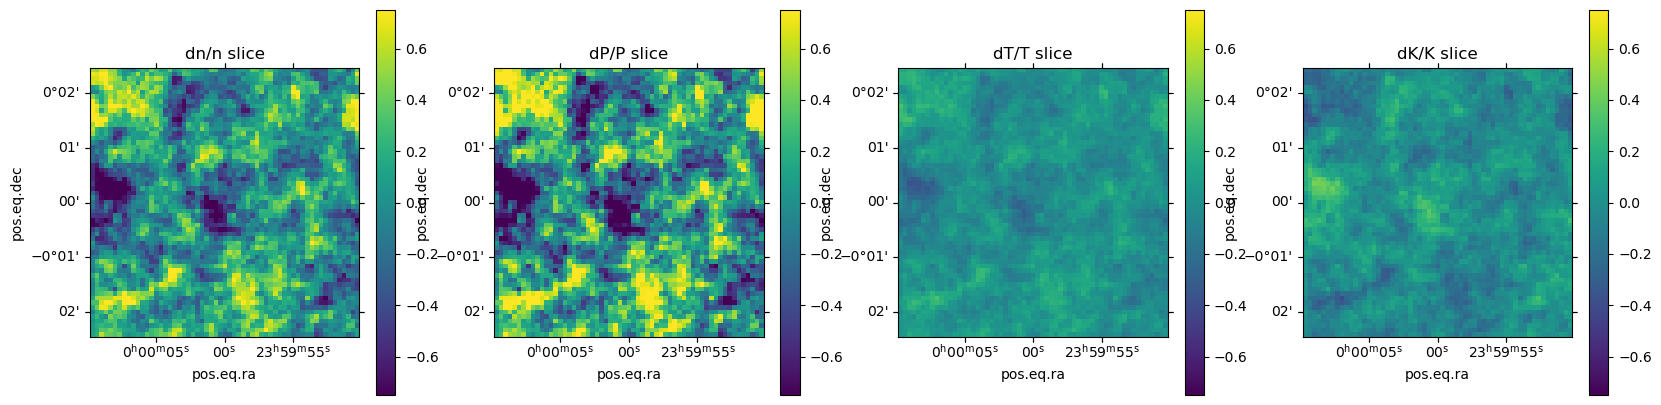

In [8]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1, 4, 1, projection=WCS(C.get_map_header()))
plt.imshow((n)[100], vmin=-0.75, vmax=0.75)
plt.colorbar()
plt.title('dn/n slice')

ax = plt.subplot(1, 4, 2, projection=WCS(C.get_map_header()))
plt.imshow((p)[100], vmin=-0.75, vmax=0.75)
plt.colorbar()
plt.title('dP/P slice')

ax = plt.subplot(1, 4, 3, projection=WCS(C.get_map_header()))
plt.imshow((t)[100], vmin=-0.75, vmax=0.75)
plt.colorbar()
plt.title('dT/T slice')

ax = plt.subplot(1, 4, 4, projection=WCS(C.get_map_header()))
plt.imshow((k)[100], vmin=-0.75, vmax=0.75)
plt.colorbar()
plt.title('dK/K slice')

# Modifi

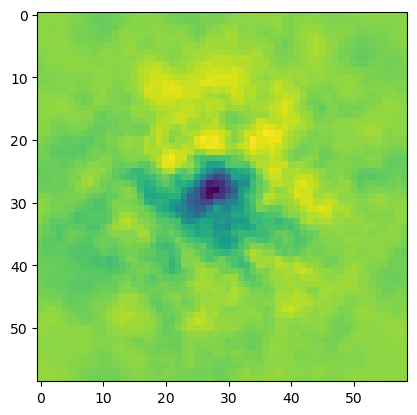

In [9]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

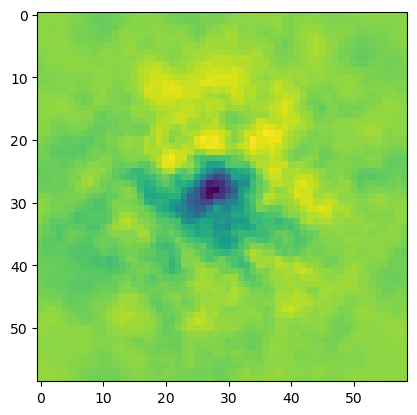

In [10]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

In [11]:
C.new_seed()

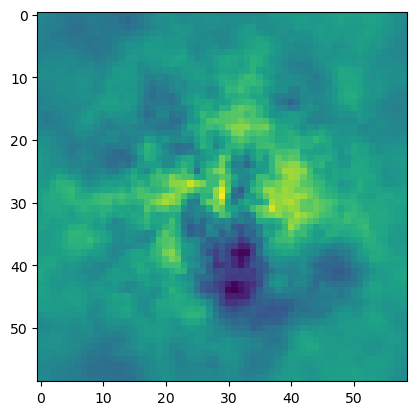

In [12]:
plt.imshow(C.get_sz_map() - C.get_sz_map(no_fluctuations=True))

# Modif of profiles

In [13]:
set_profile_using_T_model = False

if set_profile_using_T_model:
    rmod = np.logspace(-1,5,1000)*u.kpc
    Tmod = (1+rmod.value/1000)**-1*u.keV + 10*u.keV
    C.set_pressure_profile_from_temperature_model({'name':'User', 'profile':Tmod, 'radius':rmod})

In [14]:
r, n = C.get_density_profile()
r, p = C.get_pressure_profile()
r, t = C.get_temperature_profile()
r, k = C.get_entropy_profile()
r, mhse = C.get_Mhse_profile()
r, odhse = C.get_overdensity_profile()
r, odhse2 = C.get_overdensity_profile(bHSE=0.2)
r, Mgas = C.get_Mgas_profile()
r, fgas = C.get_fgas_profile()
r, fgas2 = C.get_fgas_profile(Npt_per_decade_integ=5)
r, fgas3 = C.get_fgas_profile(bHSE=0.2)
r, Uth = C.get_Ethermal_profile()
r, Uth2 = C.get_Ethermal_profile(Npt_per_decade_integ=5)

Text(0.5, 1.0, 'U thermal')

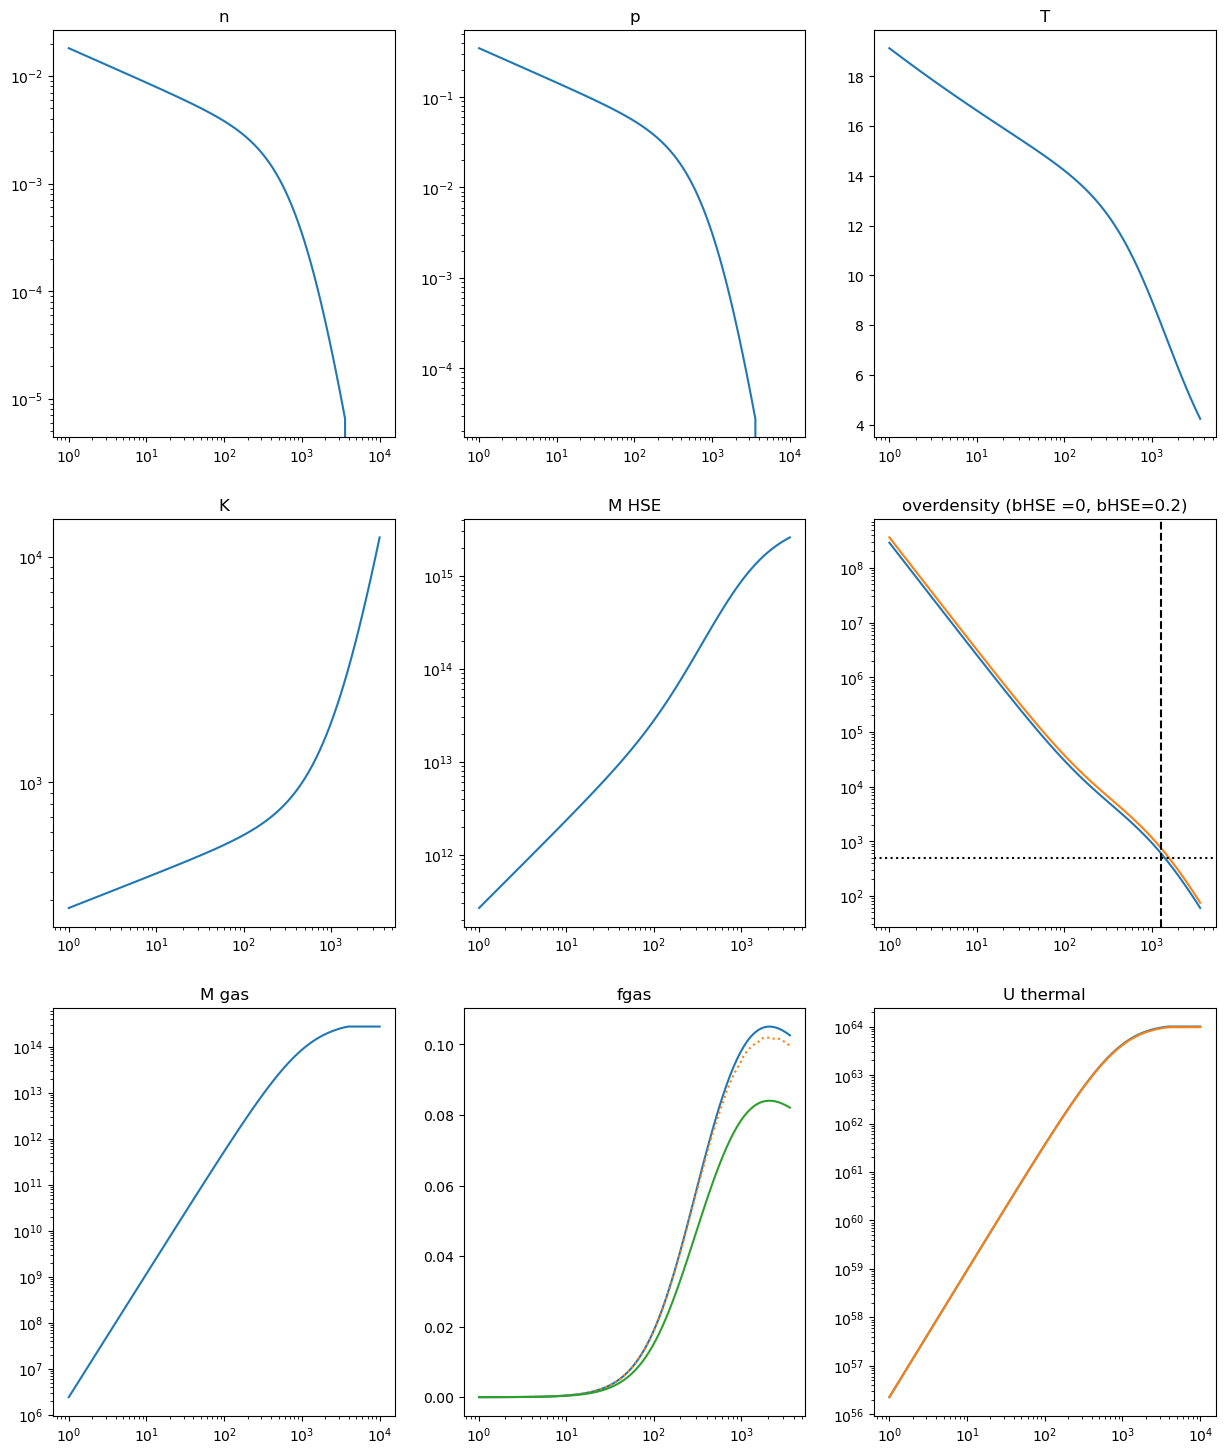

In [15]:
plt.figure(0, figsize=(15,18))
ax = plt.subplot(3, 3, 1)
plt.loglog(r,n)
plt.title('n')

ax = plt.subplot(3, 3, 2)
plt.loglog(r,p)
plt.title('p')

ax = plt.subplot(3, 3, 3)
plt.plot(r,t)
plt.xscale('log')
plt.title('T')

ax = plt.subplot(3, 3, 4)
plt.loglog(r,k)
plt.title('K')

ax = plt.subplot(3, 3, 5)
plt.loglog(r,mhse)
plt.title('M HSE')

ax = plt.subplot(3, 3, 6)
plt.loglog(r,odhse)
plt.loglog(r,odhse2)
plt.axhline(500, color='k', ls=':')
plt.axvline(C.R500.to_value('kpc'), color='k', ls='--')
plt.title('overdensity (bHSE =0, bHSE=0.2)')

ax = plt.subplot(3, 3, 7)
plt.loglog(r,Mgas)
plt.title('M gas')

ax = plt.subplot(3, 3, 8)
plt.plot(r,fgas)
plt.plot(r,fgas2, ls=':')
plt.plot(r,fgas3)
plt.xscale('log')
plt.title('fgas')

ax = plt.subplot(3, 3, 9)
plt.loglog(r,Uth)
plt.loglog(r,Uth2)
plt.title('U thermal')